## Assignment 3 PCA, kernel PCA, SVM, KNN, Random forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [2]:
seed = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

seed.info()
seed.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [3]:
print(seed.isnull().sum())
seed.columns

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

### Data preprocessing

In [4]:
x = seed.drop('Class', axis=1)
y = seed['Class']

### Standard PCA

In [5]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x)
x_pca_st = StandardScaler().fit_transform(x_pca)

### Kernel PCA

In [6]:
kpca = KernelPCA(n_components=5, kernel='rbf', gamma=0.1)
x_kpca = kpca.fit_transform(x)
x_kpca_st = StandardScaler().fit_transform(x_kpca)

In [7]:
# Split the data into training and test sets
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca_st, y, test_size=0.3, random_state=20)
x_train_kpca, x_test_kpca, y_train, y_test = train_test_split(x_kpca_st, y, test_size=0.3, random_state=20)


### Model Training 

In [8]:
# Setting up a pipeline for SVM with both PCA types
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

param_grid = {
    'classifier__C': [0.1, 1, 10, 100, 1000],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'poly', 'rbf']
}

In [9]:
# Grid search for standard PCA
grid_pca = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_pca.fit(x_train_pca, y_train)
print('Best accuracy with PCA:', grid_pca.best_score_)
print('Best parameters with PCA:', grid_pca.best_params_)

Best accuracy with PCA: 0.8868571428571428
Best parameters with PCA: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}


In [10]:
# Grid search for kernel PCA
grid_kpca = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_kpca.fit(x_train_kpca, y_train)
print('Best accuracy with kernel PCA:', grid_kpca.best_score_)
print('Best parameters with kernel PCA:', grid_kpca.best_params_)


Best accuracy with kernel PCA: 0.5091428571428571
Best parameters with kernel PCA: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}


In [11]:
# Evaluate the best models
best_model_pca = grid_pca.best_estimator_
best_model_kpca = grid_kpca.best_estimator_

y_pred_pca = best_model_pca.predict(x_test_pca)
y_pred_kpca = best_model_kpca.predict(x_test_kpca)

               precision    recall  f1-score   support

   Çerçevelik       0.87      0.92      0.89       410
Ürgüp Sivrisi       0.90      0.83      0.86       340

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



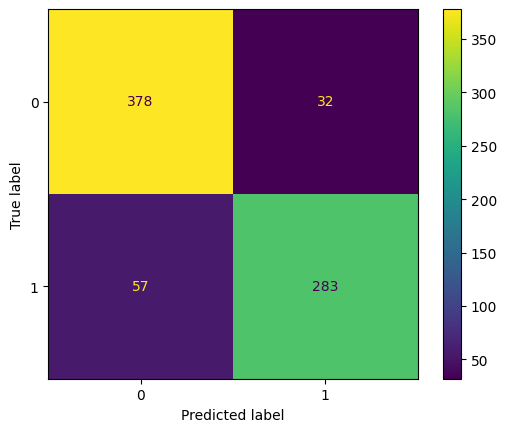

In [12]:
print(classification_report(y_test, y_pred_pca))

cm_pca = confusion_matrix(y_test, y_pred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp_pca.plot()


               precision    recall  f1-score   support

   Çerçevelik       0.55      1.00      0.71       410
Ürgüp Sivrisi       0.00      0.00      0.00       340

     accuracy                           0.55       750
    macro avg       0.27      0.50      0.35       750
 weighted avg       0.30      0.55      0.39       750



c:\Users\Roy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Roy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Roy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

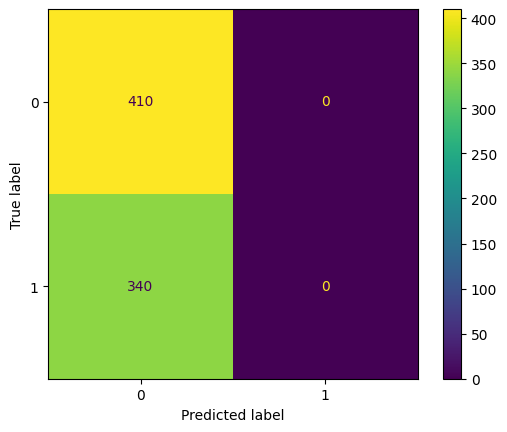

In [13]:
print(classification_report(y_test, y_pred_kpca))

cm_kpca = confusion_matrix(y_test, y_pred_kpca)
disp_kpca = ConfusionMatrixDisplay(confusion_matrix=cm_kpca)
disp_kpca.plot()
plt.show()

### <span style="color:yellow">Additional models</span> 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'classifier__C': np.logspace(-4, 4, 4),
            'classifier__solver': ['liblinear']  
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [10, 50, 100],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    }
}


In [15]:
# Function to run grid search for a given model
def run_grid_search(model_info, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    grid = GridSearchCV(pipe, model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    print(f"{model_info['model'].__class__.__name__} best parameters: {grid.best_params_}")
    print(f"{model_info['model'].__class__.__name__} best score: {grid.best_score_}")

    # Evaluating and reporting test set accuracy
    test_accuracy = grid.score(x_test, y_test)
    print(f"{model_info['model'].__class__.__name__} test set accuracy: {test_accuracy}\n")


In [16]:
# Run grid search for each model on PCA and kernel PCA data
for model_name, model_info in models_params.items():
    print(f"Results for {model_name} with PCA:")
    run_grid_search(model_info, x_train_pca, y_train, x_test_pca, y_test)
    
    print(f"Results for {model_name} with kernel PCA:")
    run_grid_search(model_info, x_train_kpca, y_train, x_test_kpca, y_test)

Results for Logistic Regression with PCA:
LogisticRegression best parameters: {'classifier__C': 0.0001, 'classifier__solver': 'liblinear'}
LogisticRegression best score: 0.884
LogisticRegression test set accuracy: 0.8813333333333333

Results for Logistic Regression with kernel PCA:
LogisticRegression best parameters: {'classifier__C': 0.0001, 'classifier__solver': 'liblinear'}
LogisticRegression best score: 0.5085714285714286
LogisticRegression test set accuracy: 0.5466666666666666

Results for Random Forest with PCA:
RandomForestClassifier best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
RandomForestClassifier best score: 0.8862857142857143
RandomForestClassifier test set accuracy: 0.8733333333333333

Results for Random Forest with kernel PCA:
RandomForestClassifier best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 10}
RandomForestClassifier best score: 0.5

### <span style="color:yellow">RESULTS</span>


PCA vs kernel PCA performance: <span style="color:yellow">PCA</span> consistently outperformed kernel PCA across all models tested. This suggest that the linear dimensionality reduction preserves more relevant information for these models compared to the non-linear transformations applied through kernel PCA.


Best performing model: Among the models tested with standard PCA, <span style="color:yellow">Random Forest</span> yielded the highest test set accuracy (86.9%), closely followed by K-Nearest Neighbors (86.8%) and Logistic Regression (88.1% training, 88.1% test accuracy).



